In [1]:
# Import required modules
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv(
    filepath_or_buffer="../data/raw/hotel_reservations.csv",
    sep=",",
    header=0
)

In [3]:
# Display the first few rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
import sys

data.info(
    verbose=True,
    buf=sys.stdout,
    memory_usage=True,
    show_counts=True
)

<bound method DataFrame.info of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2     

In [10]:
# Select columns that have numerical data type
data.select_dtypes(include=['number']).head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


### no_of_adults

In [11]:
data['no_of_adults'].describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

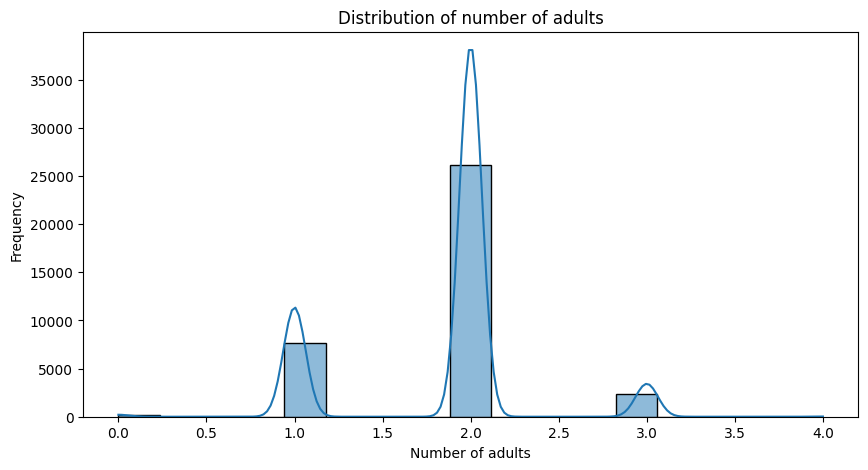

In [23]:
# Showing histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_adults'], kde=True)
plt.title('Distribution of number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Frequency')
plt.show()

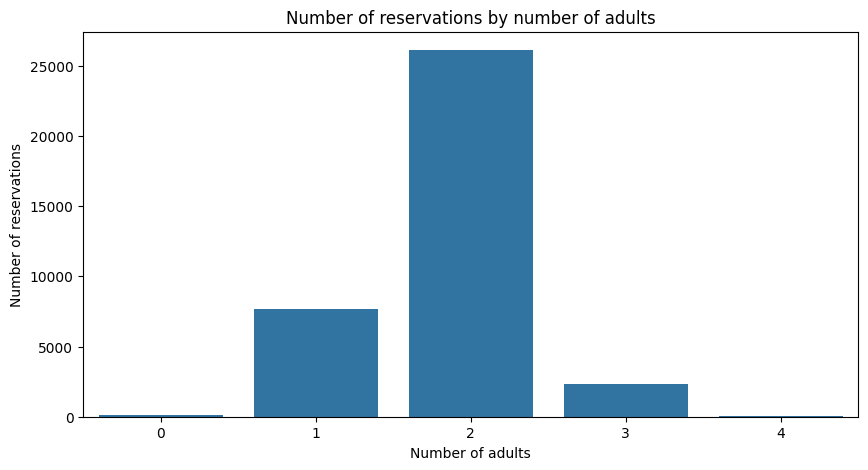

In [25]:
# Creating a bar plot for no_of_adults
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_adults'])
plt.title('Number of reservations by number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Number of reservations')
plt.show()

In [20]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['no_of_adults'])
print(f"Shapiro-Wilk test statistika: {stat}, p-vrednost: {p_value}")

if p_value > 0.05:
    print("Podaci imaju normalnu raspodelu (ne odbacuje se hipoteza H0).")
else:
    print("Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).")

Shapiro-Wilk test statistika: 0.6928603649139404, p-vrednost: 0.0
Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).


C:\Users\marij\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### no_of_children